  **Table of Contents**

  <div id="toc"></div>
  <script type="text/javascript"
  src="https://raw.github.com/kmahelona/ipython_notebook_goodies/master/ipython_notebook_toc.js">
  </script>


http://nbviewer.jupyter.org/gist/santosjorge/f3b07b2be8094deea8c6

This library binds the power of [plotly](http://www.plot.ly) with the flexibility of [pandas](http://pandas.pydata.org/) for easy plotting.

This library is available on https://github.com/santosjorge/cufflinks

This tutorial assumes that the plotly user credentials have already been configured as stated on the [getting started](https://plot.ly/python/getting-started/) guide.

In [30]:
import pandas as pd
import cufflinks as cf
import numpy as np

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
%reload_ext autoreload
%autoreload 2

We make all charts public and set a global theme

In [4]:
cf.set_config_file(world_readable=True,theme='pearl')

We create a set of timeseries

In [5]:
df=pd.DataFrame(np.random.randn(100,5),index=pd.date_range('1/1/15',periods=100),
                columns=['IBM','MSFT','GOOG','VERZ','APPL'])
df=df.cumsum()

**iplot** can be used on any DataFrame to plot on a plotly chart. 
If no filename is specified then a generic *Plotly Playground* file is created.

All the charts are created as private by default. To make them public you can use **world_readable=True**

In [6]:
df.iplot(filename='Tutorial 1')

# Customizing Themes

We can pass a **theme** to the **iplot** function. 
3 themes are available, but you can create your own
* Solar
* Pearl (Default)
* White

In [7]:
df[['APPL','IBM','VERZ']].iplot(theme='white',filename='Tutorial White')

We can also pass common metadata for the chart

In [8]:
df.iplot(theme='pearl',filename='Tutorial Metadata',title='Stock Returns',xTitle='Dates',yTitle='Returns')

# Bestfit Lines

We can easily add a bestfit line to any Series

This will automatically add a best fit approximation and the equation as the legend.

In [9]:
df['IBM'].iplot(filename='IBM Returns',bestfit=True)

/home/takanori/.local/lib/python2.7/site-packages/cufflinks/plotlytools.py:164: FutureWarning:

The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html



# Customizing Colors

We can pass any color (either by Hex, RGB or Text *)  

*Text values are specified in the cufflinks.colors modules

In [10]:
df['IBM'].iplot(filename='IBM Returns - colors',bestfit=True,colors=['pink'],bestfit_colors=['blue'])

# Filled Traces

We can add a fill to a trace with **fill=True**

In [11]:
df['IBM'].iplot(filename='Tutorial Microsoft',fill=True,colors=['green'])

# Bar Charts

We can easily create a bar chart with the parameter **kind**

In [12]:
df.sum().iplot(kind='bar',filename='Tutorial Barchart')

Bars can also be stacked by a given dimension

In [18]:
tmp = df.resample('M').iplot(kind='bar',barmode='stacked',filename='Tutorial Bar Stacked')
print tmp
print tmp.url
tmp

/home/takanori/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:


.resample() is now a deferred operation
You called iplot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead



<plotly.tools.PlotlyDisplay object>
None


# Spread and Ratio charts

We can also create spread and ratio charts on the fly with **kind='spread'** and **kind='ratio'**

In [22]:
df[['VERZ','IBM']].iplot(filename='Tutorial Spread',kind='spread')

In [23]:
(df[['GOOG','MSFT']]+20).iplot(filename='Tutorial Ratio',kind='ratio',colors=['green','red'])

# Annotations

Annotations can be added to the chart and these are automatically positioned correctly. 

**Annotations** should be specified in a dictionary form

In [24]:
annotations={'2015-01-15':'Dividends','2015-03-31':'Split Announced'}
df['MSFT'].iplot(filename='Tutorial Annotations',annotations=annotations)

# Output as Image

The output of a chart can be in an image mode as well. 

For this we can use **asImage=True**

We can also set the dimensions (optional) with **dimensions=(width,height)**

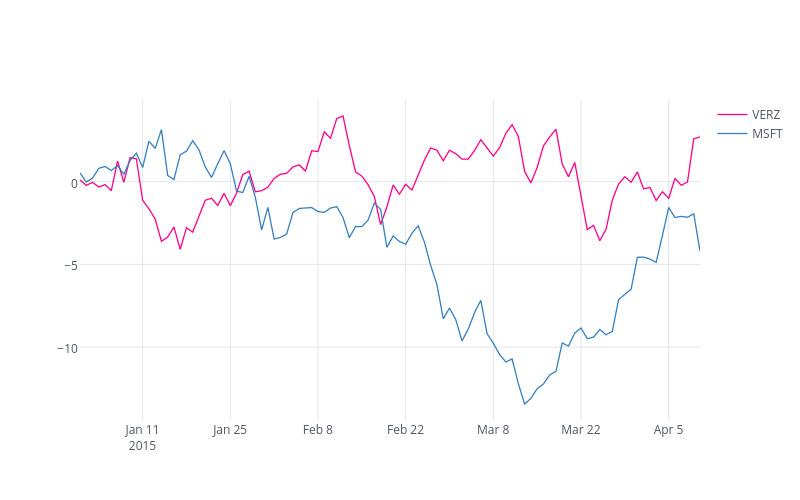

In [25]:
df[['VERZ','MSFT']].iplot(filename='Tutorial Image',theme='white',colors=['pink','blue'],asImage=True,dimensions=(800,500))

# ++Advanced Use 


## Get figure object
It is also possible to get the Plotly Figure as an output to tweak it manually

We can achieve this with **asFigure=True**

Or with `df.figure()`

In [38]:
fig = df['GOOG'].iplot(asFigure=True)
print fig.keys()
print df.figure().keys()
py.iplot(fig)


['layout', 'data']
['layout', 'data']


## Get Data object
```python
df.to_iplot()
```
We can also get the **Data** object directly

In [33]:
data=df.to_iplot()

In [34]:
data[0]['name']='My Custom Name'

And pass this directly to **iplot**

In [35]:
df.iplot(data=data,filename='Tutorial Custom Name')

## Get Layout object

In [40]:
df.layout()

{'legend': {'bgcolor': '#F5F6F9', 'font': {'color': '#4D5663'}},
 'paper_bgcolor': '#F5F6F9',
 'plot_bgcolor': '#F5F6F9',
 'titlefont': {'color': '#4D5663'},
 'xaxis1': {'gridcolor': '#E1E5ED',
  'showgrid': True,
  'tickfont': {'color': '#4D5663'},
  'title': '',
  'titlefont': {'color': '#4D5663'},
  'zerolinecolor': '#E1E5ED'},
 'yaxis1': {'gridcolor': '#E1E5ED',
  'showgrid': True,
  'tickfont': {'color': '#4D5663'},
  'title': '',
  'titlefont': {'color': '#4D5663'},
  'zerolinecolor': '#E1E5ED'}}